## Poissson Autoregression model fitting

This notebook contains the fitting of the Poisson Autorregression to each series in the dataset, generating an unique object to forecast with all independent models at the same time.

In [1]:
import os
import sys
import pickle
import pandas as pd

src_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(src_path)

from PoissonAutoregression.PoissonAutoregression import MultivariatePoissonAutorregresion
from DataSimulation.utils import plot_fit

In [2]:
data = pd.read_csv('data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,11.0,4.0,43.0,31.0,15.0,3.0,56.0,7.0,322.0
1,35.0,7.0,4.0,14.0,26.0,13.0,0.0,51.0,4.0,232.0
2,10.0,4.0,5.0,9.0,43.0,44.0,4.0,39.0,3.0,416.0
3,33.0,7.0,4.0,23.0,13.0,33.0,0.0,38.0,11.0,912.0
4,4.0,4.0,4.0,17.0,16.0,21.0,2.0,52.0,14.0,3409.0


In [3]:
test_size = 12
train_data = data.iloc[:-test_size, :].to_numpy()
test_data = data.iloc[-test_size:, :].to_numpy()
print(train_data.shape)
print(test_data.shape)

(188, 10)
(12, 10)


In [4]:
multi_ar_p = MultivariatePoissonAutorregresion()
multi_ar_p.fit(train_data)

The best model uses parameters p = 8 and q = 12 with a cv_score of 78.30740510639363
The best model uses parameters p = 12 and q = 4 with a cv_score of 37.08544354797656
The best model uses parameters p = 1 and q = 1 with a cv_score of 2.827891376031355
The best model uses parameters p = 1 and q = 2 with a cv_score of 608.4005448589602
The best model uses parameters p = 3 and q = 2 with a cv_score of 113.08371112813063
The best model uses parameters p = 9 and q = 1 with a cv_score of 1314.555137608401
The best model uses parameters p = 1 and q = 2 with a cv_score of 2.9827776523593745
The best model uses parameters p = 4 and q = 1 with a cv_score of 674.2182321011494
The best model uses parameters p = 11 and q = 1 with a cv_score of 37.63791141487097
The best model uses parameters p = 2 and q = 1 with a cv_score of 16790803.061242297


In [5]:
fitted_values = multi_ar_p.fitted_values

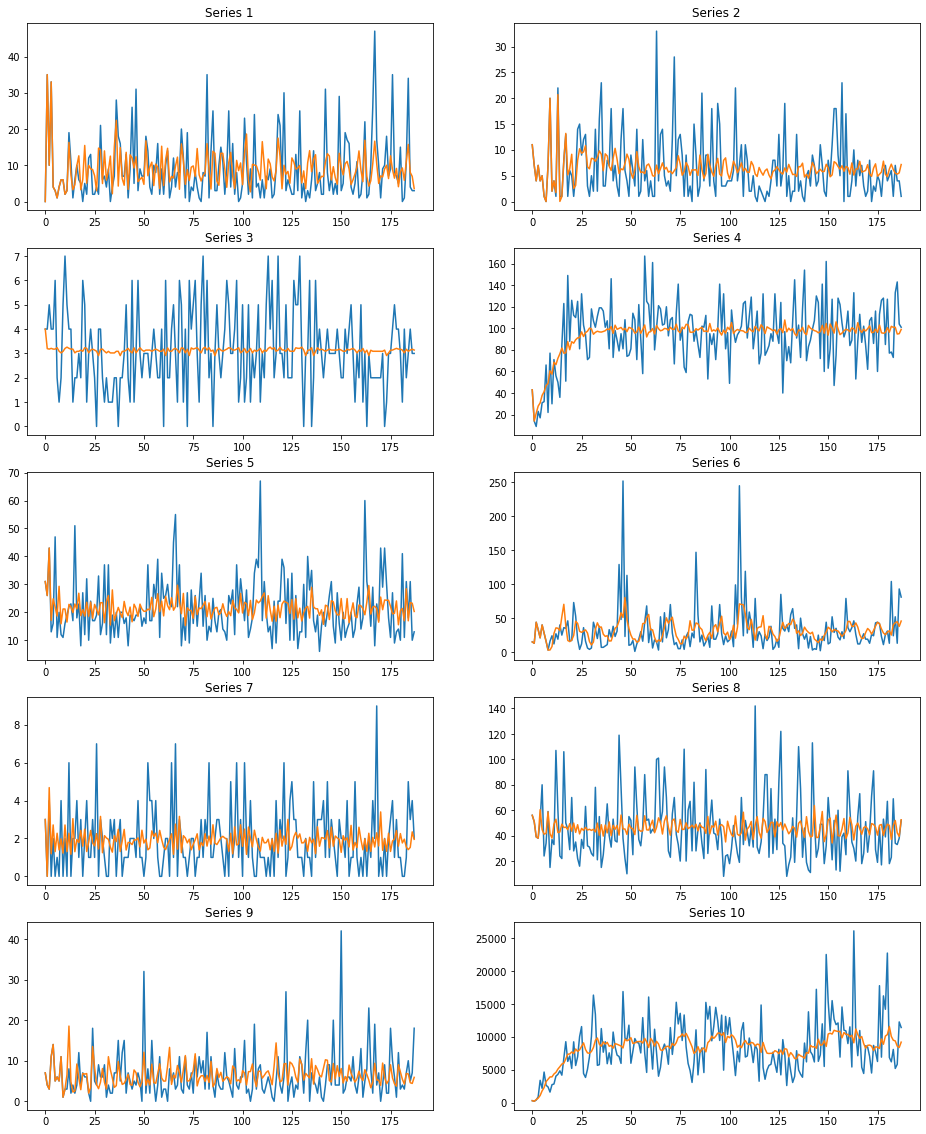

In [6]:
plot_fit(train_data, fitted_values, cols=2)

In [7]:
with open("poisson_autoregression.pkl", "wb") as file:
    pickle.dump(multi_ar_p, file)